## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Based on the data provided our data science team would wish to determine if the email message received is a spam or normal message.

### b) Defining the Metric for Success

> To term these project successful, we should be able to classify if the the email message is a spam message or normal message

> 

### c) Understanding the context 

> The Spambase data set was created by Mark Hopkins, Erik Reeber, George Forman, and Jaap Suermondt at Hewlett-Packard Labs. It includes 4601 observations corresponding to email messages, 1813 of which are spam. From the original email messages, 58 different attributes were computed.

### d) Recording the Experimental Design

The following steps will be followed in conducting this study:
1.Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording our observations.
6. Performing classification using any of the Naive-Bayes algorithm.
7. Challenge our solution

### e) Data Relevance

> The dataset to use for this project is found by following this link:[https://archive.ics.uci.edu/ml/datasets/Spambase].
> The dataset contains 4600 records and 58 different features. Our target feature is to classify wether the email message is spam or normal messege.

## 2. Reading the Data

In [237]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = Dataset source = http://bit.ly/DiabetesDataSource
# ---
#
import pandas as pd
import numpy as np
spambase_df = pd.read_csv('spambase.data')



## 3. Checking the Data

In [238]:
# Determining the no. of records in our dataset
#
spambase_df.shape

(4600, 58)

In [239]:
# Previewing the top of our dataset
#
spambase_df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [240]:
# Previewing the bottom of our dataset
#
spambase_df.tail() 

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [241]:
# Checking whether each column has an appropriate datatype
#
spambase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

> From our findings we get our dataset has 55 float features and 3 integer features.

In [242]:
spambase_df.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

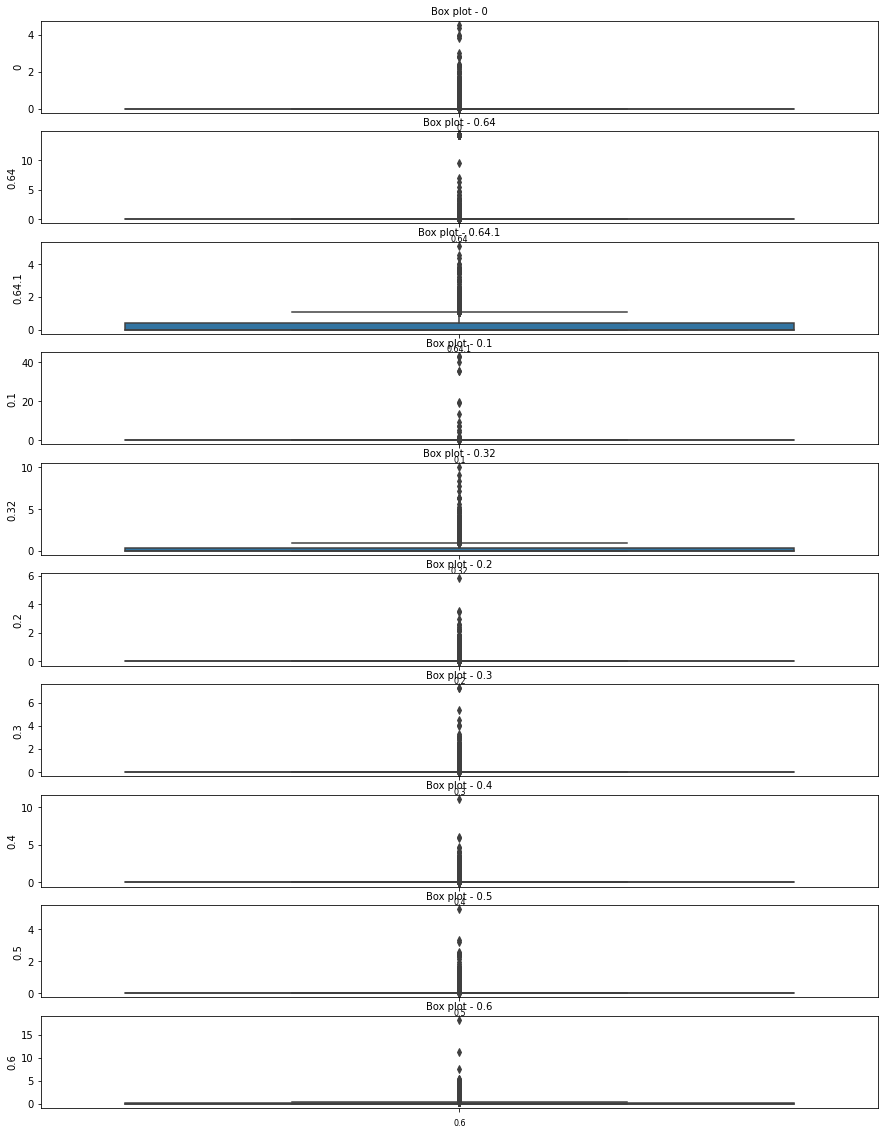

In [243]:
# Checking for Outliers
#
import matplotlib.pyplot as plt
import seaborn as sns

col_names = ['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6']
fig, ax = plt.subplots(len(col_names), figsize= (15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = spambase_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

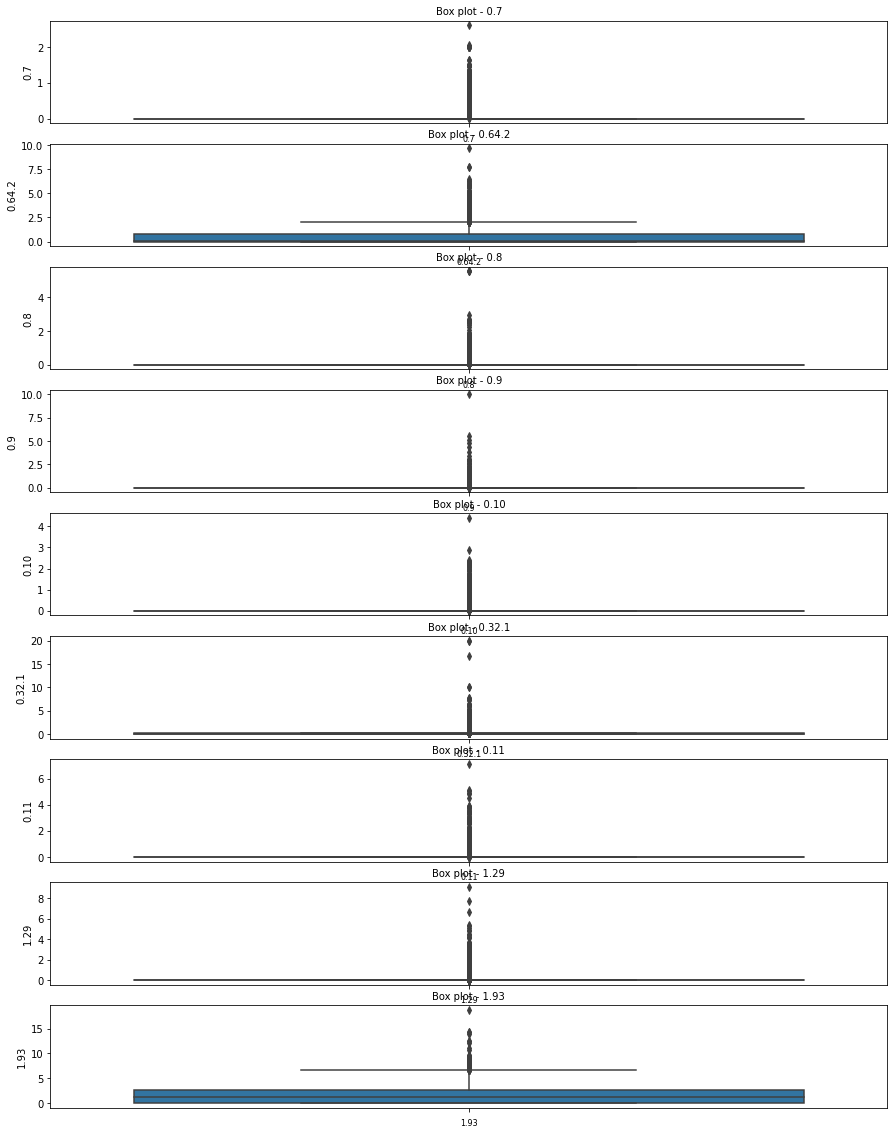

In [244]:
col_names = ['0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93']
fig, ax = plt.subplots(len(col_names), figsize= (15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = spambase_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

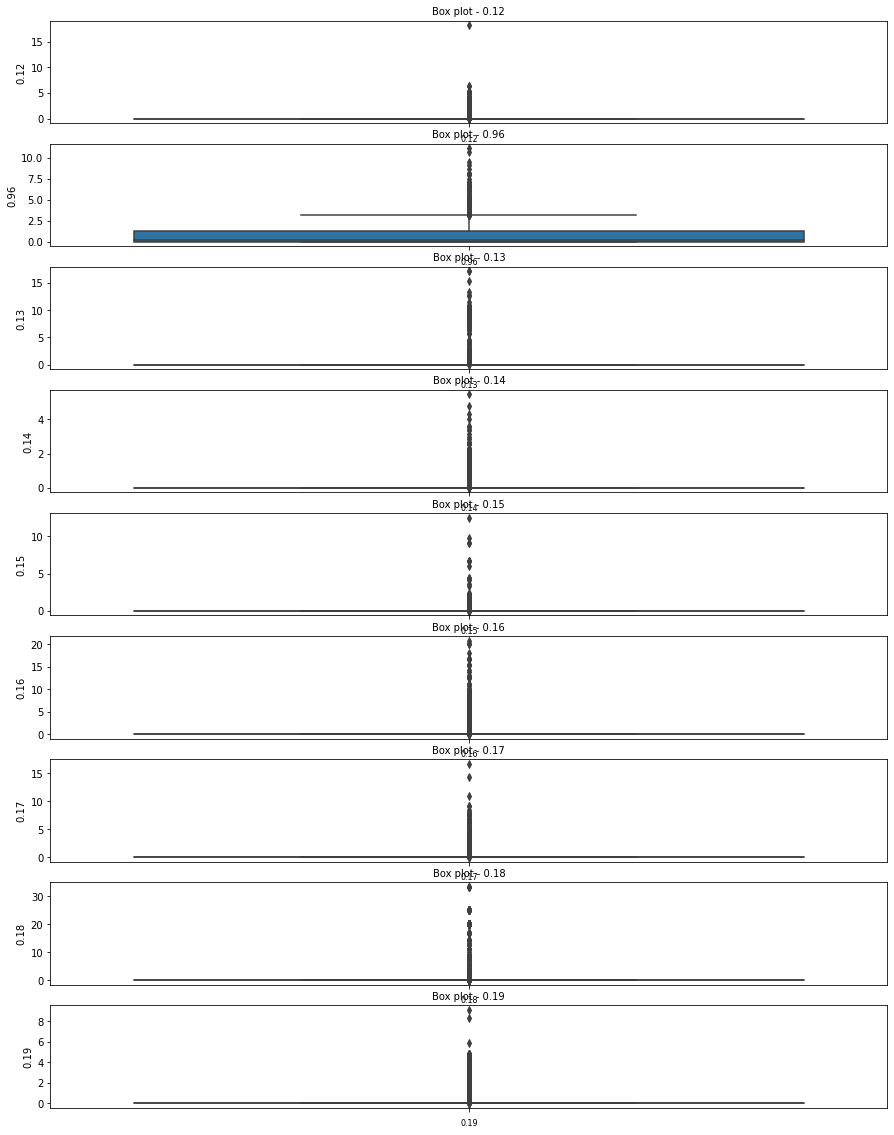

In [245]:
col_names = ['0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19']
fig, ax = plt.subplots(len(col_names), figsize= (15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = spambase_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

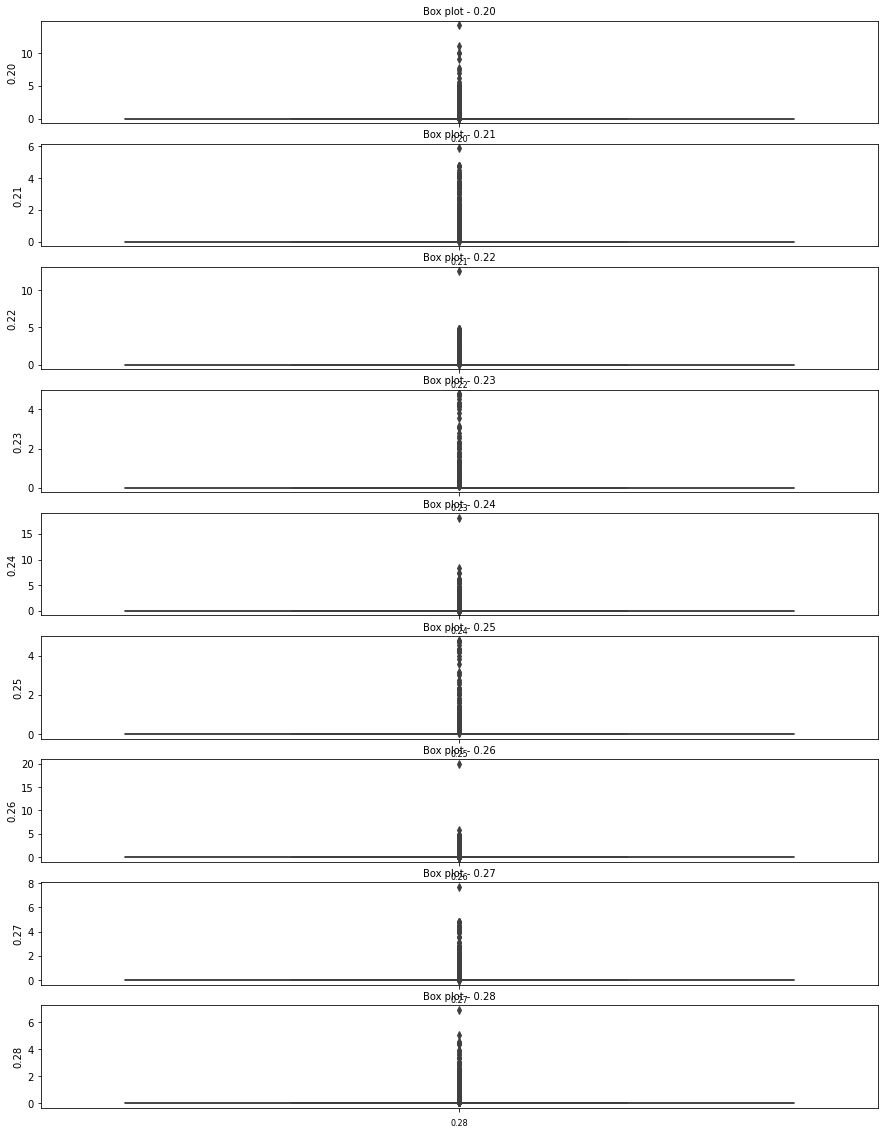

In [246]:
col_names = ['0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28']
fig, ax = plt.subplots(len(col_names), figsize= (15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = spambase_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

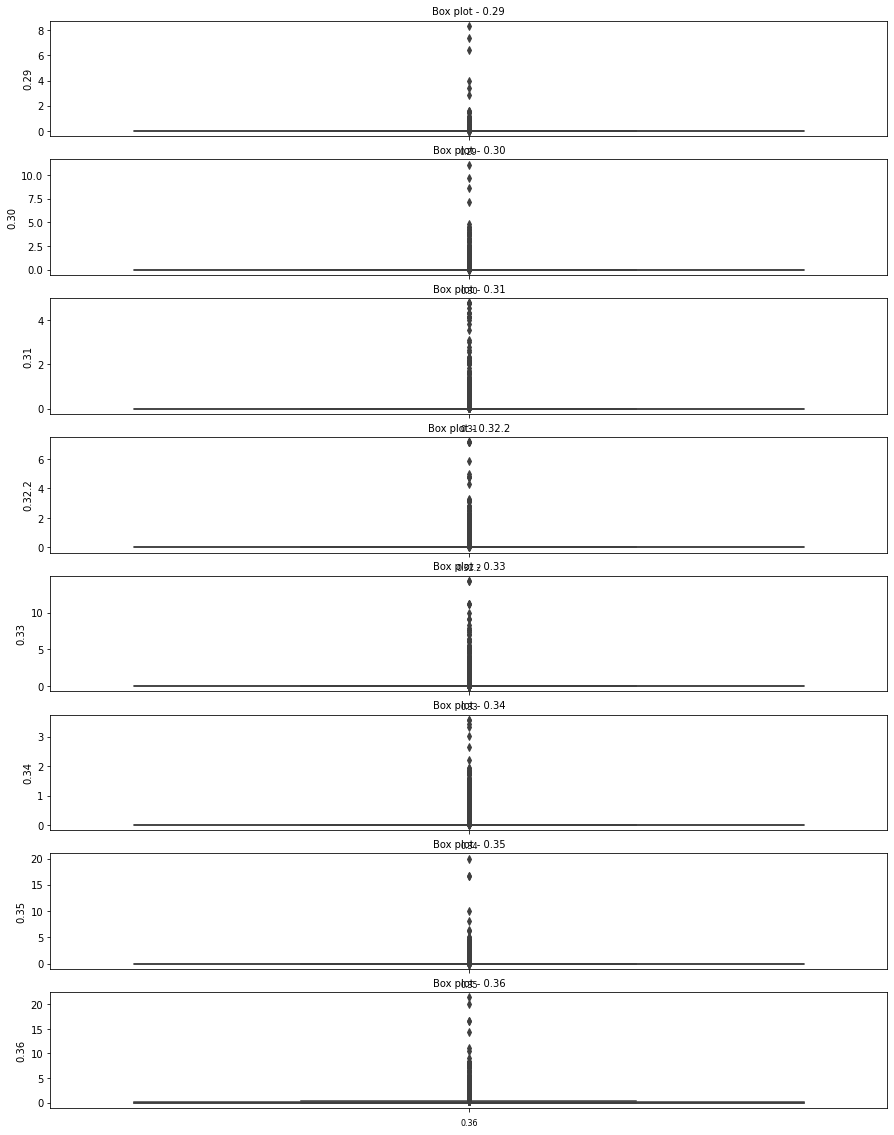

In [247]:
col_names = ['0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36']
fig, ax = plt.subplots(len(col_names), figsize= (15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = spambase_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

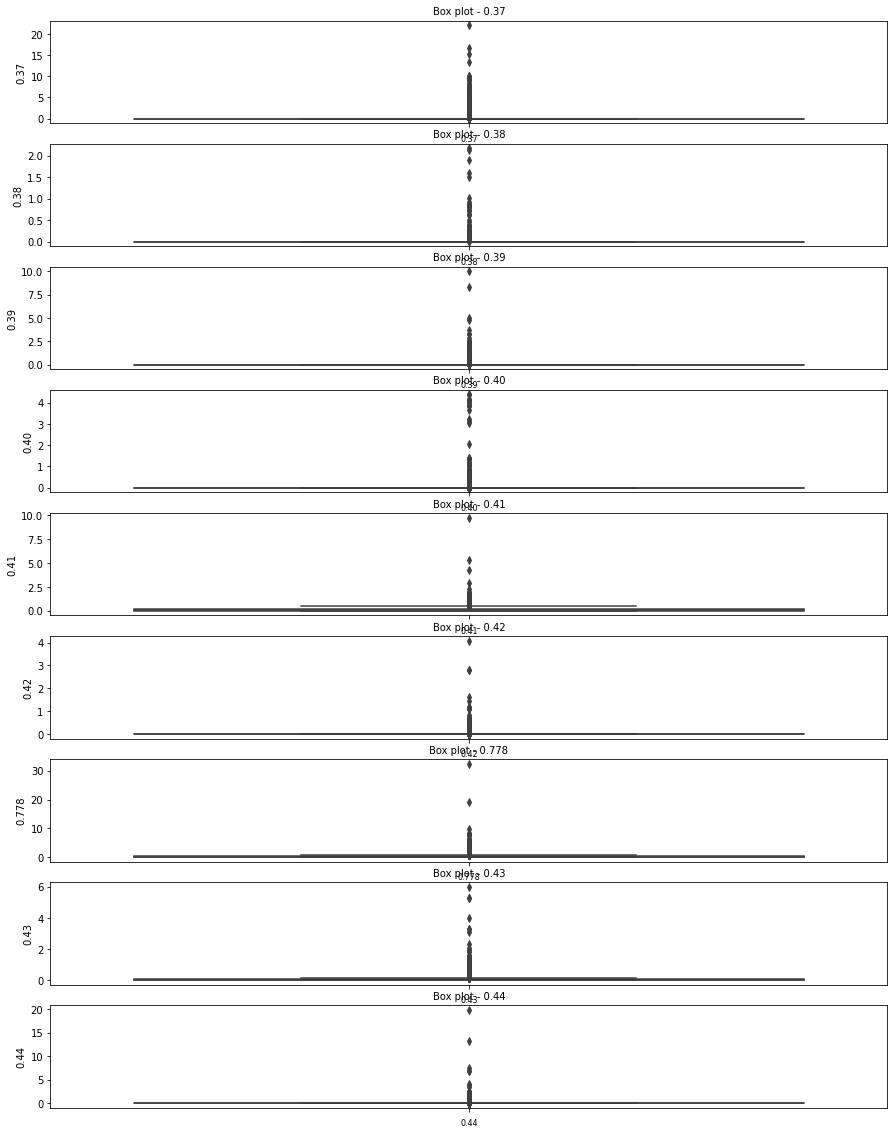

In [248]:
col_names = ['0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44']
fig, ax = plt.subplots(len(col_names), figsize= (15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = spambase_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

> After checking for outliers we find that all of the features has outliers. 

In [249]:
# Checking for Anomalies
#
Q1 = spambase_df.quantile(0.25)
Q3 = spambase_df.quantile(0.75)

IQR = Q3 - Q1
IQR
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

print('Lower_Bound' +str(lower_bound))
print('Upper_Bound' +str(upper_bound))

Lower_Bound0           0.000000
0.64        0.000000
0.64.1     -0.630000
0.1         0.000000
0.32       -0.573750
0.2         0.000000
0.3         0.000000
0.4         0.000000
0.5         0.000000
0.6        -0.240000
0.7         0.000000
0.64.2     -1.200000
0.8         0.000000
0.9         0.000000
0.10        0.000000
0.32.1     -0.150000
0.11        0.000000
1.29        0.000000
1.93       -3.960000
0.12        0.000000
0.96       -1.905000
0.13        0.000000
0.14        0.000000
0.15        0.000000
0.16        0.000000
0.17        0.000000
0.18        0.000000
0.19        0.000000
0.20        0.000000
0.21        0.000000
0.22        0.000000
0.23        0.000000
0.24        0.000000
0.25        0.000000
0.26        0.000000
0.27        0.000000
0.28        0.000000
0.29        0.000000
0.30        0.000000
0.31        0.000000
0.32.2      0.000000
0.33        0.000000
0.34        0.000000
0.35        0.000000
0.36       -0.165000
0.37        0.000000
0.38        0.000000
0.

In [250]:
# Dealing with outliers

spambase_df1 = spambase_df[~((spambase_df < (Q1 - 1.5 * IQR)) |(spambase_df > (Q3 + 1.5 * IQR))).any(axis=1)]
spambase_df1.shape

(176, 58)

> Removing the outliers will couse us loose almost all of our dataset.

In [251]:
# Identifying the Missing Data
#
spambase_df.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

> We had no null columns

## 6. Exploratory Analysis

#### Univariate Analysis

In [252]:
spambase_df.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

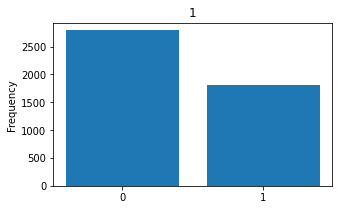

1 /n 0    2788
1    1812
Name: 1, dtype: int64


In [253]:
def ba_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    
    """
    # get feature
    var = spambase_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    
    # visualize
    plt.figure(figsize = (5,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} /n {}".format(variable,varValue))

category1 = ["1"]
for ka in category1:
  ba_plot(ka)

> From our categorical variables, 2788 messages were classified as spam while 1812 messages were classified as normal messages.

#### Bivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca73f43790>,
      dtype=object)

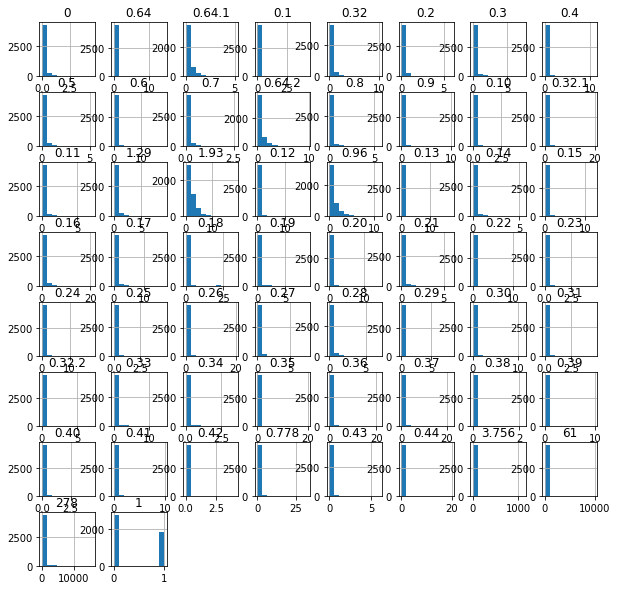

In [254]:
# Ploting the bivariate summaries and recording our observations
#
# plotting data hystograms

spambase_df.hist(figsize = (10,10))

> Most of our features are right skewed.

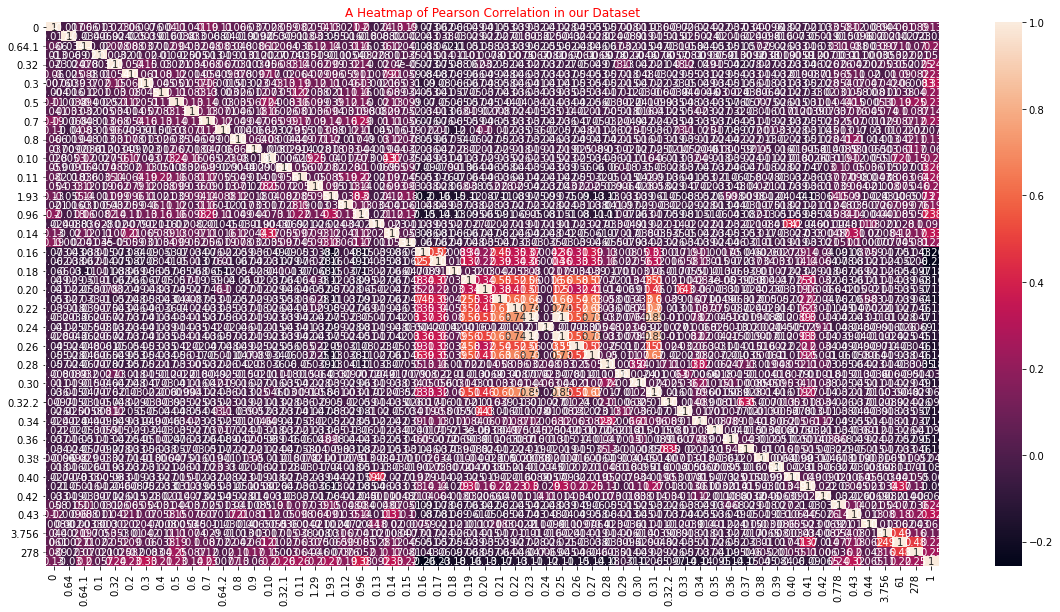

In [255]:
# Calculating the pearson coefficient correlation
plt.figure(figsize = (20,10))
sns.heatmap(spambase_df.corr(), annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()

In [256]:
# finding the correlation

spambase_df.corr()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,1.000000,-0.016735,0.065684,0.013270,0.023120,0.059650,0.007647,-0.003970,0.106241,0.041171,0.188441,0.105811,0.066416,0.036768,0.028425,0.059393,0.081906,0.053504,0.128256,0.021282,0.197061,-0.024358,0.134053,0.188143,-0.072530,-0.061710,-0.066443,-0.048698,-0.041264,-0.052817,-0.039079,-0.032069,-0.041028,-0.027701,-0.044969,-0.054692,-0.057338,-0.007965,-0.011148,-0.036110,-0.009712,-0.026083,-0.024308,-0.022126,-0.037128,-0.034071,-0.000958,-0.017763,-0.026517,-0.021235,-0.033313,0.058342,0.117398,-0.008852,0.044488,0.061387,0.089165,0.126323
0.64,-0.016735,1.000000,-0.033579,-0.006920,-0.023761,-0.024815,0.003939,-0.016261,-0.003803,0.032989,-0.006843,-0.040406,-0.018836,-0.009194,0.005344,-0.009123,-0.018348,0.033366,-0.055488,-0.015794,-0.018200,-0.008841,-0.020481,0.001999,-0.043461,-0.038191,-0.030291,-0.029205,-0.021928,-0.027492,-0.018086,-0.003316,-0.024891,-0.004292,-0.024044,-0.028181,-0.023990,-0.008918,-0.019111,-0.014808,-0.015411,-0.025165,-0.002355,-0.019730,-0.016397,-0.023844,-0.009813,-0.015739,-0.007270,-0.049802,-0.018516,-0.014506,-0.009584,0.001953,0.002086,0.000268,-0.022679,-0.030318
0.64.1,0.065684,-0.033579,1.000000,-0.020240,0.077737,0.087624,0.036725,0.012044,0.093843,0.032135,0.048304,0.083197,0.047644,0.008580,0.122150,0.063896,0.036314,0.121665,0.139314,0.031139,0.156641,-0.035665,0.123724,0.041181,-0.087879,-0.062417,-0.108857,-0.050615,-0.057703,-0.032514,-0.038905,-0.061852,-0.054735,-0.061687,-0.048307,-0.046469,-0.066970,0.032418,-0.014782,-0.047040,-0.030939,-0.005784,-0.044296,-0.053448,-0.050621,-0.056628,0.029351,-0.026328,-0.033190,-0.016417,-0.033098,0.108054,0.087671,-0.003320,0.097410,0.107462,0.070119,0.196840
0.1,0.013270,-0.006920,-0.020240,1.000000,0.003238,-0.010018,0.019781,0.010265,-0.002458,-0.004951,-0.012980,-0.019220,-0.013203,0.012006,0.002705,0.007433,0.003467,0.019422,-0.010832,-0.005383,0.008177,0.028101,0.011365,0.035358,-0.015185,-0.013711,-0.010687,-0.010370,-0.007799,-0.010478,-0.007531,-0.006718,-0.008077,-0.006730,-0.006124,-0.006517,-0.007765,-0.002669,-0.004604,-0.007645,-0.005672,-0.008097,-0.009270,-0.005935,-0.012960,-0.009183,-0.003349,-0.001925,-0.000592,-0.012376,-0.007150,-0.003132,0.010859,-0.000299,0.005260,0.022081,0.021369,0.057394
0.32,0.023120,-0.023761,0.077737,0.003238,1.000000,0.054055,0.147338,0.029599,0.020824,0.034497,0.068383,0.066788,0.031127,0.003446,0.056177,0.083024,0.143446,0.062368,0.098510,0.031527,0.136605,-0.020207,0.070039,0.000040,-0.072502,-0.075456,-0.088011,-0.061500,0.032048,-0.052066,-0.042535,-0.026748,-0.031997,-0.026960,-0.049731,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115042,-0.048878,0.015234,-0.042336,-0.077985,-0.026900,-0.032005,-0.032759,-0.046361,-0.026389,0.025509,0.041583,0.002016,0.052662,0.052290,0.002492,0.241958
0.2,0.059650,-0.024815,0.087624,-0.010018,0.054055,1.000000,0.061142,0.079543,0.117416,0.013869,0.053878,0.009272,0.077609,0.009660,0.173055,0.019872,0.064114,0.078547,0.095518,0.058967,0.106844,0.007948,0.211437,0.059314,-0.084430,-0.087296,-0.069070,-0.066242,-0.048686,-0.048145,-0.046396,-0.036847,-0.034178,-0.037327,-0.054331,-0.052838,-0.057491,-0.017923,-0.047633,-0.029880,-0.029466,-0.054826,-0.030632,-0.028837,-0.053661,-0.033061,-0.014349,-0.031702,-0.019131,-0.008745,-0.015145,0.065094,0.105671,0.019887,-0.010282,0.090177,0.082089,0.232741
0.3,0.007647,0.003939,0.036725,0.019781,0.147338,0.061142,1.000000,0.044530,0.050767,0.056787,0.159562,-0.001454,0.013276,-0.022734,0.042892,0.128442,0.187965,0.122202,0.111803,0.046124,0.130804,-0.002101,0.064778,0.030562,-0.089517,-0.080350,-0.065908,-0.066962,-0.048493,-0.058116,-0.046290,-0.040548,-0.041384,-0.040920,-0.053215,-0.053995,-0.052057,-0

> There are very weak correlation between the features, therefore our data is good for classification prediction.

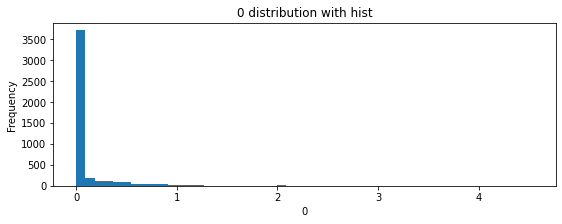

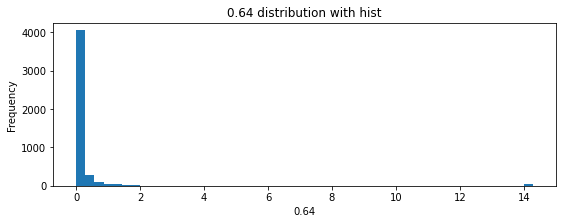

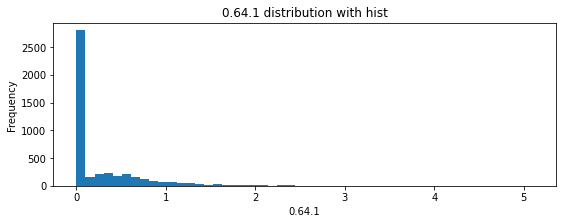

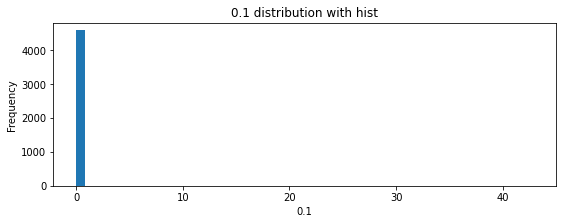

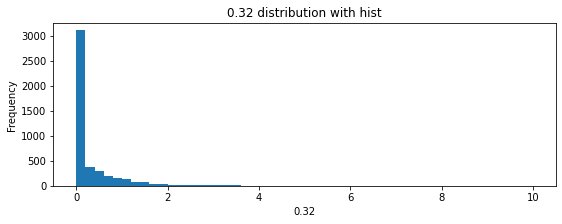

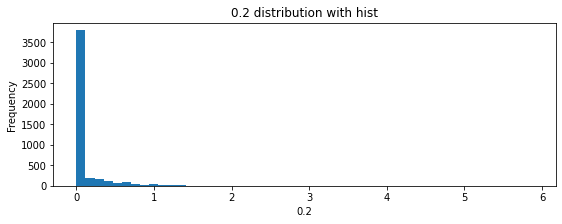

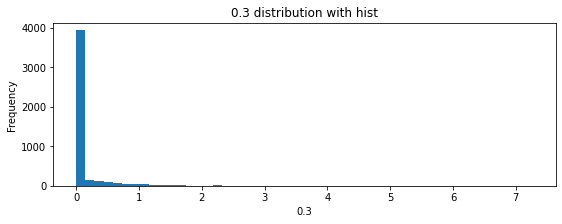

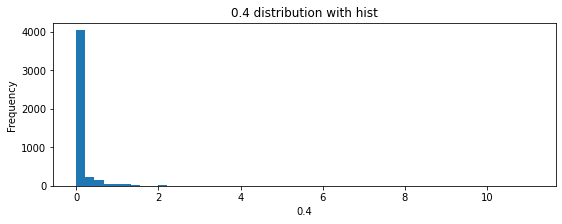

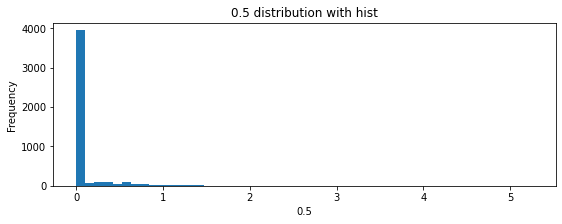

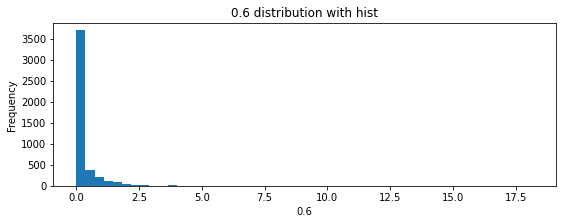

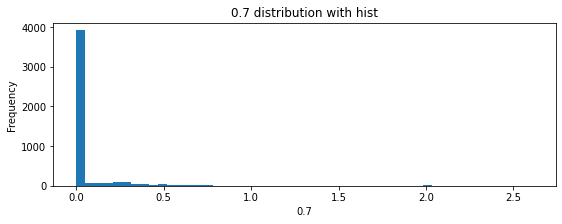

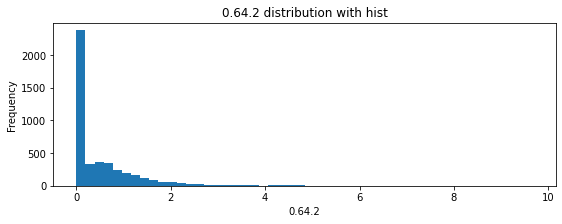

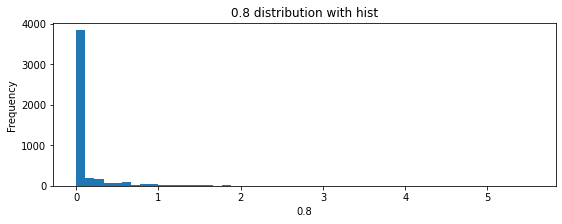

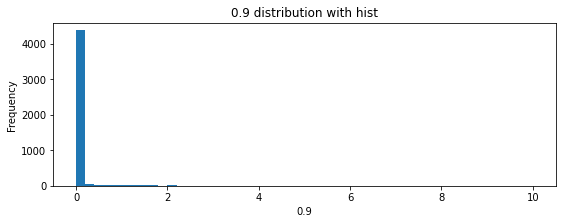

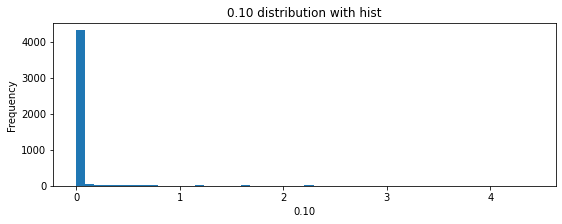

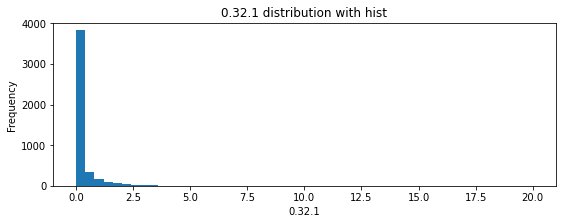

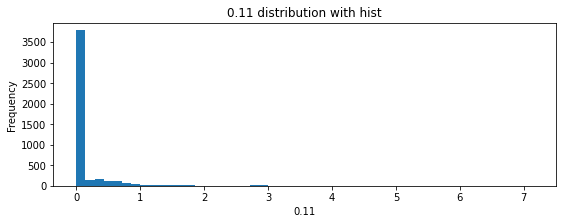

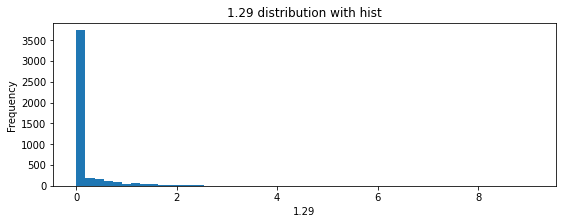

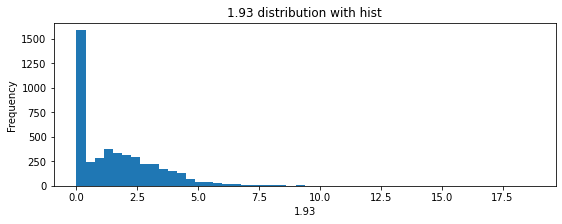

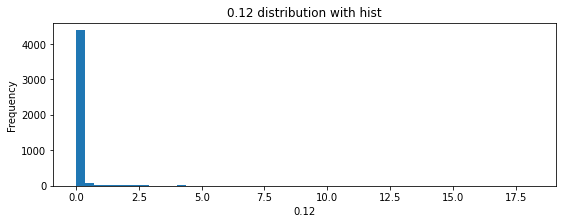

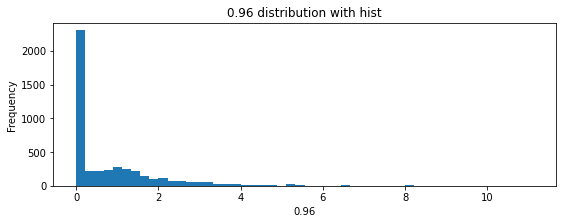

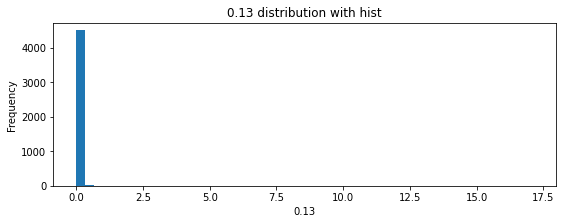

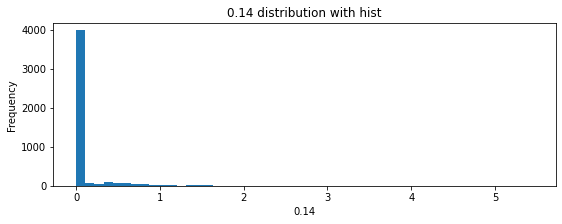

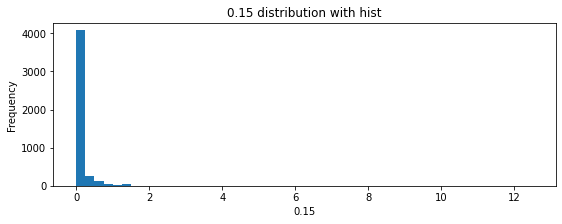

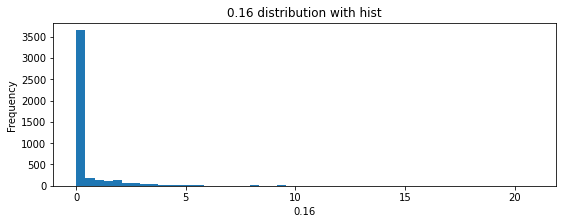

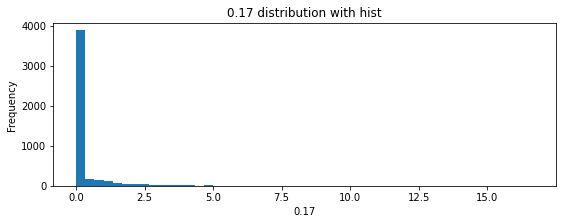

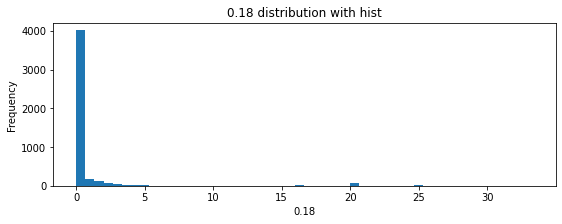

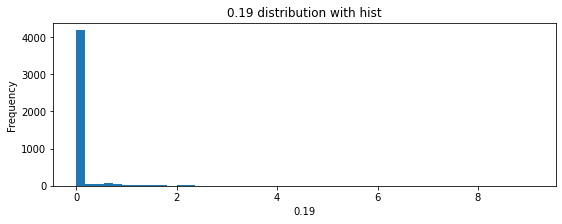

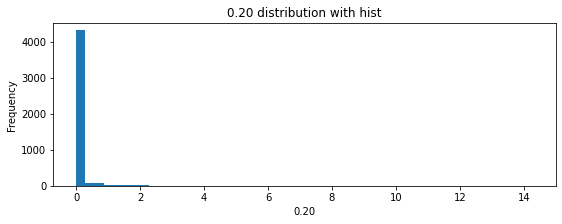

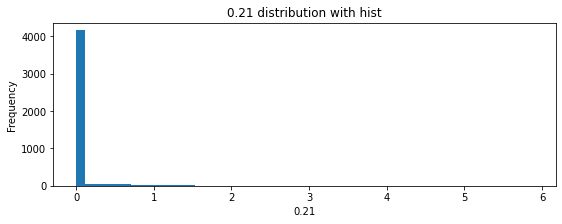

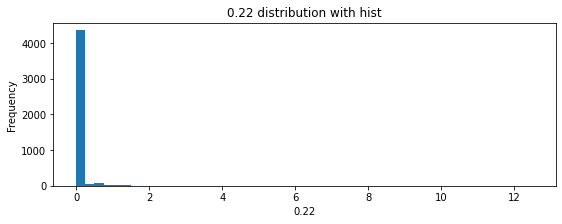

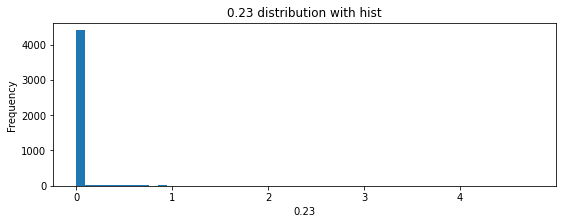

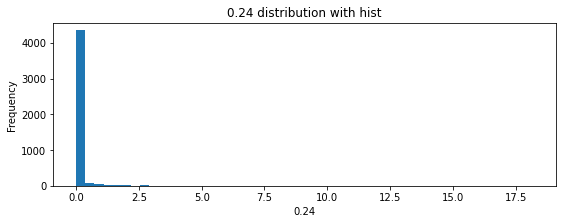

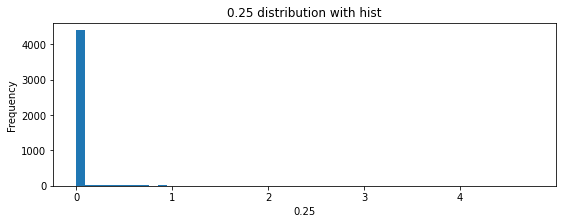

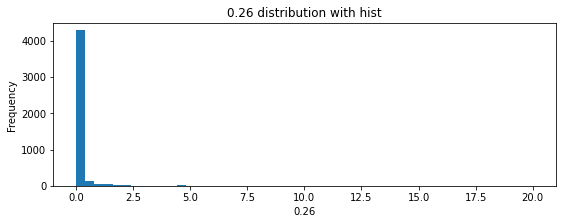

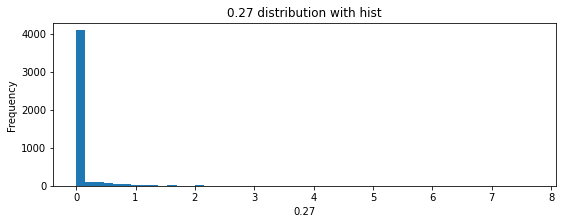

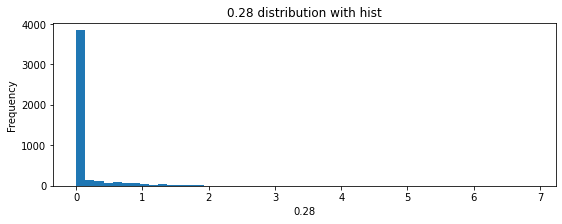

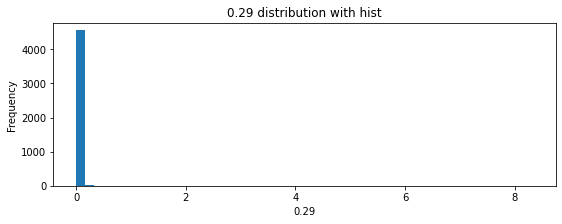

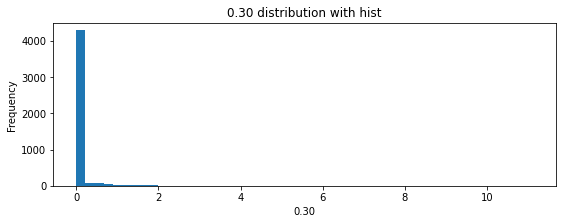

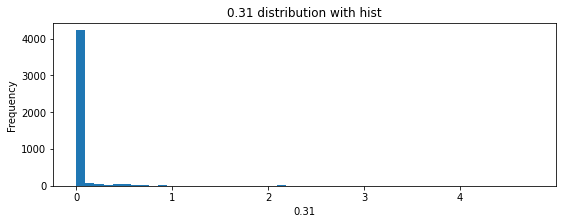

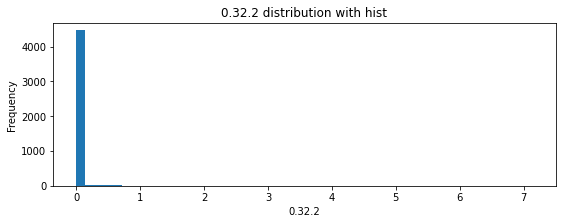

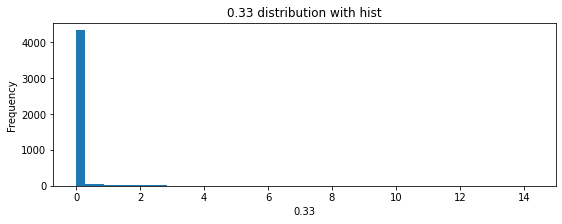

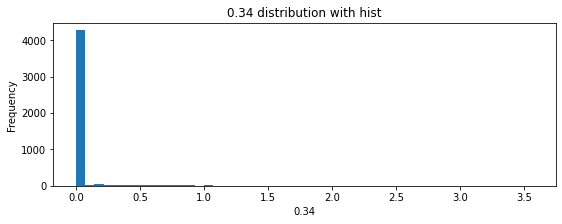

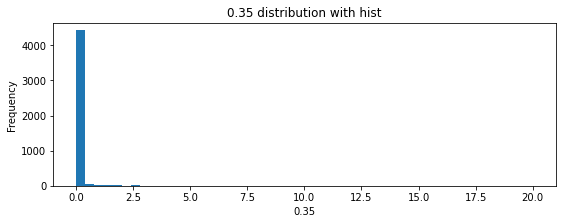

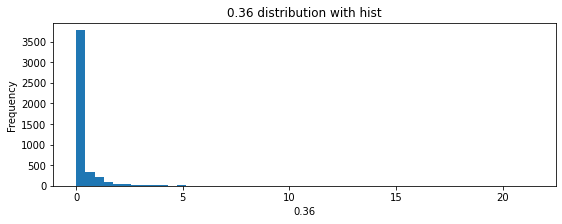

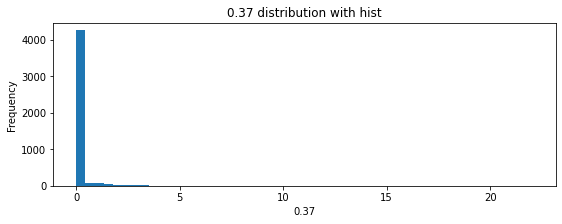

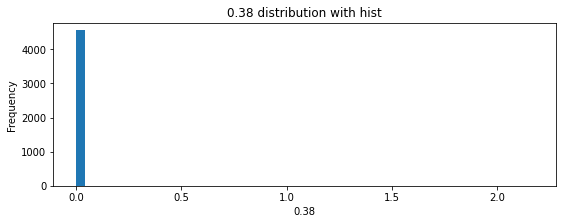

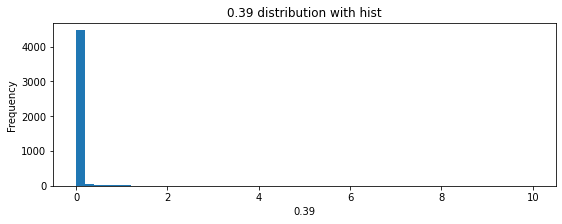

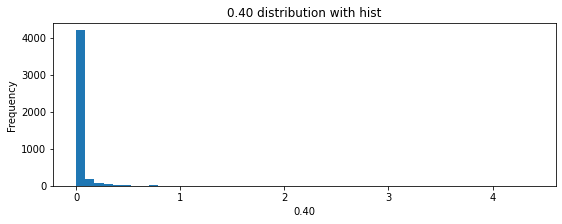

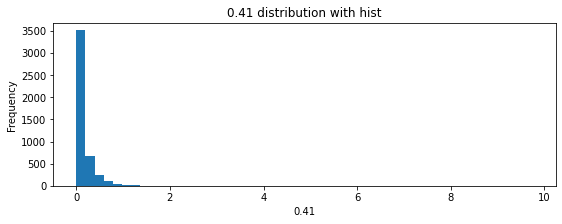

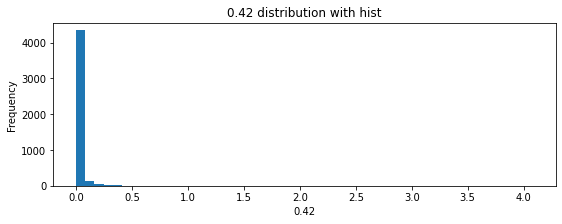

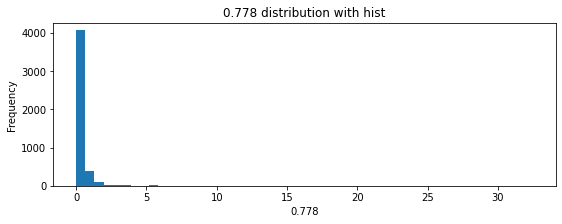

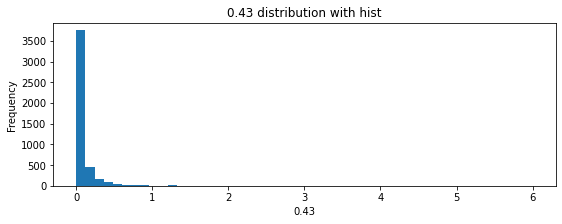

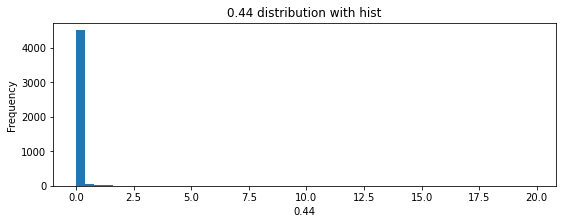

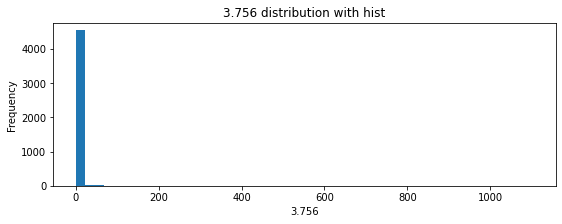

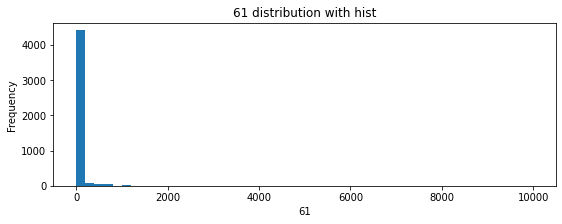

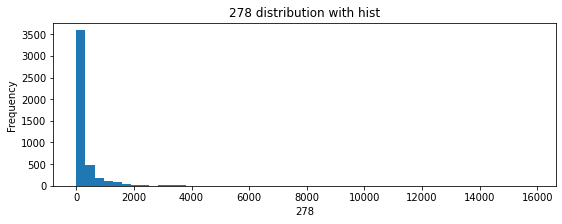

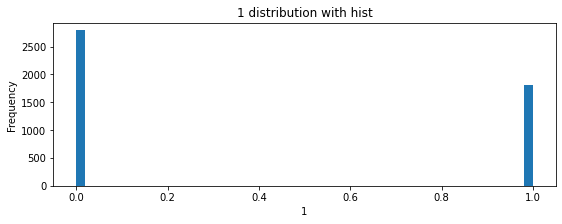

In [257]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(spambase_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

numericVar = ['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1']
for n in numericVar:
    plot_hist(n)

> Most of our features are right skewed and have tails to the left.

#### Multivariate Analysis

##### Linear Discriminant Data Analysis

In [258]:
# Data Reduction
#
# Data Reduction using Discriminant Analysis
#
X = spambase_df.iloc[:, 0:57].values
y = spambase_df.iloc[:, 57].values

# diving our dataset into training and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [259]:
# Feature scaling
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [260]:
# Peforming LDA
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [261]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [262]:
# Evaluating the Performance
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[497  41]
 [ 38 344]]
Accuracy0.9141304347826087


> After reducing our dimension using lenear discreminant analysis, we find a good accuracy at 0.91.

## 7. Implementing the Solution

> Since our features are continuous we shall use Gaussian Naive Bayes Classifier

In [263]:
# Implementing the Solution
# Training our model
# 
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
# Training our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [264]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.9032608695652173


> We shall try to improve our prediction by using different training and test size since our prediction accuracy is lower compared to the LDA model.

In [265]:
# Dividing our dataset into traing and testing set
#
X = spambase_df.iloc[:, 0:57].values
y = spambase_df.iloc[:, 57].values

# diving our dataset into training at 0.7 and test 0.3

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [266]:
# Feature scaling
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [267]:
# Peforming LDA
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [268]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [269]:
# Predicting our test predictors
import numpy as np 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.9036231884057971


> Using a lower train set of 0.7 and a higher test set of 0.3 we find the exact accuracy as for train set 0.8 and test set 0.2.

In [270]:
# Dividing our dataset into traing and testing set
#
X = spambase_df.iloc[:, 0:57].values
y = spambase_df.iloc[:, 57].values

# diving our dataset into training at 0.6 and test 0.4

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [271]:
# Feature scaling
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [272]:
# Peforming LDA
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [273]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [274]:
# Predicting our test predictors
import numpy as np 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.9081521739130435


> Simillaly, using a train set of 0.6 and test set of 0.4 we get an accuracy almost simillar to the rest.

## 8. Challenging the solution

> Challenging our solution by Normalizing our data

In [275]:
# Dividing our dataset into traing and testing set
#
X = spambase_df.iloc[:, 0:57].values
y = spambase_df.iloc[:, 57].values

# diving our dataset into training at 0.8 and test 0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [276]:
# Feature scaling
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [277]:
# Peforming LDA
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [278]:
# Reviewing the Solution 
#
from sklearn.preprocessing import Normalizer

# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
normalizer.transform(X)

array([[2.03297105e-04, 2.71062806e-04, 4.84040726e-04, ...,
        4.95076854e-03, 9.77762266e-02, 9.95187732e-01],
       [2.59683978e-05, 0.00000000e+00, 3.07292708e-04, ...,
        4.25059392e-03, 2.09911216e-01, 9.77710178e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.81192865e-02, 2.04911354e-01, 9.78451717e-01],
       ...,
       [2.53812946e-03, 0.00000000e+00, 2.53812946e-03, ...,
        1.18784459e-02, 5.07625892e-02, 9.98330921e-01],
       [1.22759766e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.46672345e-02, 6.39373781e-02, 9.97423098e-01],
       [0.00000000e+00, 0.00000000e+00, 1.59858723e-02, ...,
        3.07420620e-02, 1.22968248e-01, 9.83745986e-01]])

In [279]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [280]:
# Predicting our test predictors
import numpy as np 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.9032608695652173


In [281]:
# Feature scaling
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [282]:
# Peforming LDA
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [283]:
# Reviewing the Solution 
#
from sklearn.preprocessing import Normalizer

# Create normalizer
normalizer = Normalizer(norm='l1')

# Transform feature matrix
normalizer.transform(X)

array([[1.83253109e-04, 2.44337479e-04, 4.36316927e-04, ...,
        4.46264953e-03, 8.81360192e-02, 8.97067601e-01],
       [2.16967275e-05, 0.00000000e+00, 2.56744609e-04, ...,
        3.55139268e-03, 1.75381880e-01, 8.16881790e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.46126230e-02, 1.65254430e-01, 7.89089903e-01],
       ...,
       [2.25862796e-03, 0.00000000e+00, 2.25862796e-03, ...,
        1.05703788e-02, 4.51725592e-02, 8.88393664e-01],
       [1.08237310e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.29321036e-02, 5.63735991e-02, 8.79428146e-01],
       [0.00000000e+00, 0.00000000e+00, 1.17022234e-02, ...,
        2.25042758e-02, 9.00171032e-02, 7.20136826e-01]])

In [284]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [285]:
# Predicting our test predictors
import numpy as np 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.9032608695652173


> By normalizing our data, we neither did not a better accuracy compared to the rest.

> Removing the outliers to find out if it performs better

In [286]:
# Dividing our dataset into traing and testing set
#
X = spambase_df1.iloc[:, 0:57].values
y = spambase_df1.iloc[:, 57].values

# diving our dataset into training at 0.8 and test 0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [287]:
# Feature scaling
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [288]:
# Peforming LDA
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [289]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [290]:
# Predicting our test predictors
import numpy as np 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8611111111111112


> When we removed the ouliers we got lesser accuracy, therefore it was not ideal to remove the outliers since we lose alot of data which may not be good for our prediction accuracy. 

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes, we had the right data.

### b). Do we need other data to answer our question?

> No, we have the right data to answer our question.

### c). Did we have the right question?

> Yes, we had the right question to be answered.